In [1]:
import casatools

In [2]:
%matplotlib inline
import pylab as pl
import numpy as np
from astropy import units as u, visualization, coordinates
from astropy.visualization import simple_norm

In [3]:
from casatools import table
from casatools import msmetadata
from casatasks import split
from casatools import image
from casatasks import tclean

ia = image()
msmd = msmetadata()
tb = table()

In [5]:
cd /lustre/cv/projects/ALMA_IMF/2017.1.01355.L

/lustre/cv/projects/ALMA_IMF/2017.1.01355.L


In [5]:
def showimage(imagename, title=None, stretch='asinh', mask=None, **kwargs):
    if isinstance(imagename, str):
        ia.open(imagename)
        data = ia.getchunk().squeeze()
        ia.close()
    else:
        data = imagename
        
    if 'percentiles' in kwargs:
        min_percent, max_percent = kwargs.pop('percentiles')
        kwargs['min_percent'] = min_percent
        kwargs['max_percent'] = max_percent
            
    if mask is not None:
        data = data.squeeze().T * mask.T,
    else:
        data = data.squeeze().T
            
    pl.imshow(data,
              norm=simple_norm(data,
                               stretch=stretch,
                               **kwargs))
    if title is not None:
        pl.title(title)
    pl.gca().set_xticklabels([])
    pl.gca().set_yticklabels([])
    pl.colorbar()

In [6]:
from astropy import units as u, coordinates

In [7]:
tb.open('/lustre/cv/projects/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/uid___A002_Xcf0c6b_X4bbc_W51-E_B6_spw0.split/FIELD')
#print(tb.colnames())
names = tb.getcol('NAME')
direction = tb.getcol("PHASE_DIR")
#print(names)
#print(direction)
tb.close()

True

In [8]:
coords = coordinates.SkyCoord(direction[0]*u.rad, direction[1]*u.rad, frame='icrs')

In [9]:
%matplotlib inline
import pylab as pl

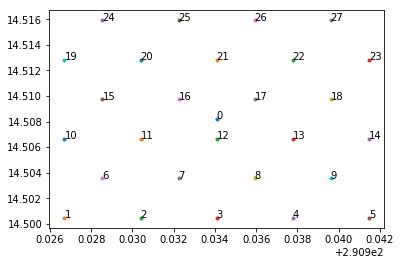

In [10]:
pl.clf()
center = coords.ra.deg.mean(), coords.dec.deg.mean()
pl.plot(coords.ra.deg, coords.dec.deg, '.')
for ii,cc in enumerate(coords[0]):
    #print(ii, cc, cc.ra.deg, cc.dec.deg)
    pl.text(cc.ra.deg, cc.dec.deg, str(ii))

In [11]:
import glob
mses = glob.glob("./science_goal.uid___A001_X1296_X211/group.uid___*/member.uid___*/calibrated/uid___*_W51-E_B6_spw0.split")

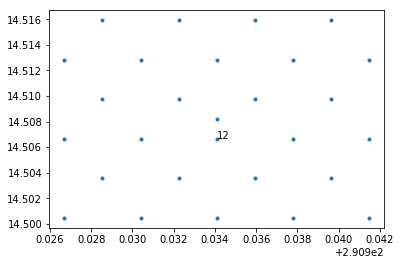

In [12]:
for ms in mses:
    
    tb.open(f"{ms}/FIELD")
    names = tb.getcol('NAME')
    #print(ms, len(names))
    direction = tb.getcol("PHASE_DIR")
    tb.close()
    
    coords = coordinates.SkyCoord(direction[0][0]*u.rad, direction[1][0]*u.rad, frame='icrs')
    
    if len(coords) > 20:

        pl.clf()
        center = coords.ra.deg.mean(), coords.dec.deg.mean()
        pl.plot(coords.ra.deg, coords.dec.deg, '.')
        pl.text(coords[12].ra.deg, coords[12].dec.deg, "12")
        #for ii,cc in enumerate(coords[0]):
        #    #print(ii, cc, cc.ra.deg, cc.dec.deg)
        #    pl.text(cc.ra.deg, cc.dec.deg, str(ii))

In [13]:
import os
os.path.basename('./science_goal.uid___A001_X1296_X211/group.uid___A001_X1296_X212/member.uid___A001_X1296_X215/calibrated/uid___A002_Xcf0c6b_X4bbc_W51-E_B6_spw0.split')

'uid___A002_Xcf0c6b_X4bbc_W51-E_B6_spw0.split'

In [14]:
print("Splitting MSes")
for ms in mses:
    tb.open(f"{ms}/ANTENNA")
    antennadiam = tb.getcol("DISH_DIAMETER")
    tb.close()
    if np.all(antennadiam > 10):
        outputvis = f"{os.path.basename(ms)}.field12"
        if not os.path.exists(outputvis):
            print(f"Splitting {ms}")
            split(vis=ms, outputvis=outputvis, field="12", datacolumn='data')

Splitting MSes


In [15]:
mses_field12 = glob.glob("*field12")
print(f"Found mses {mses_field12}")

Found mses ['uid___A002_Xc96463_X6519_W51-E_B6_spw0.split.field12', 'uid___A002_Xc96f17_X6e3d_W51-E_B6_spw0.split.field12', 'uid___A002_Xcf0c6b_X4bbc_W51-E_B6_spw0.split.field12']


!mkdir field12_tests

!rm -rf field12_tests/Field12_W51E_test_standard_robust2.psf

In [ ]:
ls field12_tests/

tclean(vis=mses_field12,
       imagename='field12_tests/Field12_W51E_test_standard_robust2',
       spw='0:100',
       gridder='standard',
       imsize=512,
       cell='0.1arcsec',
       niter=1000,
       deconvolver='multiscale',
       scales=[0,3,9,27],
       weighting='briggs',
       robust=2,
      )

ls field12_tests/

In [ ]:
print("TEST")